In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import h5py 

In [11]:
train_set = h5py.File("datasets/train_signs.h5","r")
test_set = h5py.File("datasets/test_signs.h5","r")

In [15]:
#<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
x_train = np.array(train_set["train_set_x"])
x_test = np.array(test_set["test_set_x"])
y_train = np.array(train_set["train_set_y"])
y_test = np.array(test_set["test_set_y"])
classes = np.array(train_set["list_classes"])

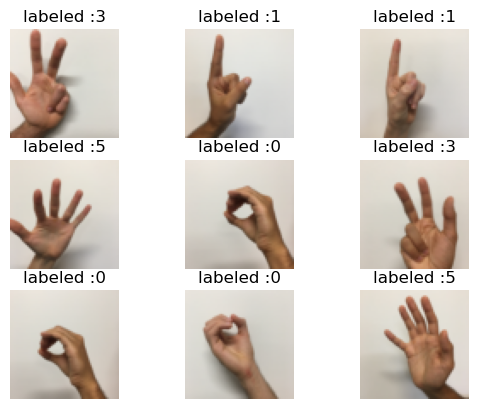

In [18]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[46+i])
    plt.title("labeled :"+str(y_train[46+i]))
    plt.axis("off")

In [19]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(1080, 64, 64, 3) (120, 64, 64, 3) (1080,) (120,)


In [20]:
from tensorflow import keras
from keras import layers 

In [57]:
normalizer = layers.Normalization(input_shape=[None,64,64,3])
normalizer.adapt(x_train)

In [75]:
del model

In [76]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,5,padding="same",activation="relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(32,2,padding="same",activation="relu"),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(32,activation="relu"),
    layers.Dense(6)

])

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics = ["accuracy"]
)

In [77]:
history = model.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
9/9 [==============================] - 6s 305ms/step - loss: 1.7760 - accuracy: 0.2037 - val_loss: 2.6879 - val_accuracy: 0.1583
Epoch 2/50
9/9 [==============================] - 2s 191ms/step - loss: 1.5533 - accuracy: 0.3972 - val_loss: 3.5741 - val_accuracy: 0.1667
Epoch 3/50
9/9 [==============================] - 2s 193ms/step - loss: 1.1790 - accuracy: 0.5231 - val_loss: 3.7431 - val_accuracy: 0.2583
Epoch 4/50
9/9 [==============================] - 2s 180ms/step - loss: 0.8509 - accuracy: 0.6926 - val_loss: 6.7396 - val_accuracy: 0.2583
Epoch 5/50
9/9 [==============================] - 2s 169ms/step - loss: 0.5821 - accuracy: 0.7935 - val_loss: 9.8187 - val_accuracy: 0.3000
Epoch 6/50
9/9 [==============================] - 1s 163ms/step - loss: 0.5058 - accuracy: 0.8185 - val_loss: 8.1006 - val_accuracy: 0.3667
Epoch 7/50
9/9 [==============================] - 1s 163ms/step - loss: 0.3997 - accuracy: 0.8657 - val_loss: 5.7269 - val_accuracy: 0.3500
Epoch 8/50
9/9 [====

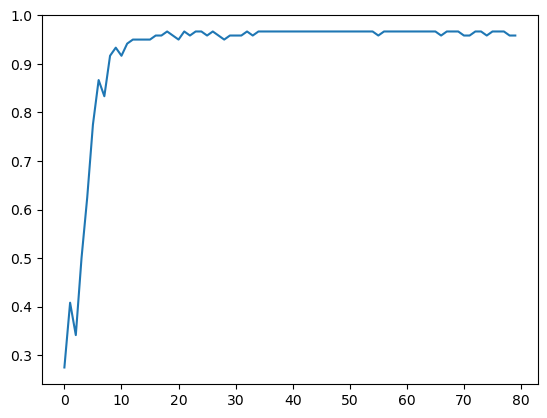

In [73]:
plt.plot(history.history["val_accuracy"])